<a href="https://colab.research.google.com/github/ShyamSundhar1411/My-ML-Notebooks/blob/master/Milestone%20Projects/Milestone_Project_3_Bitpredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Dataset

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-03-26 14:49:11--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.03s   

2023-03-26 14:49:11 (6.38 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [2]:
import pandas as pd
import tensorflow as tf
import numpy as np

In [3]:
dataset = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",parse_dates = 
                      [ 'Date'],index_col = ['Date'])

In [4]:
dataset

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.654990,124.304660,124.751660,122.563490
2013-10-02,BTC,125.455000,123.654990,125.758500,123.633830
2013-10-03,BTC,108.584830,125.455000,125.665660,83.328330
2013-10-04,BTC,118.674660,108.584830,118.675000,107.058160
2013-10-05,BTC,121.338660,118.674660,121.936330,118.005660
...,...,...,...,...,...
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [6]:
dataset.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


In [7]:
len(dataset)

2787

In [8]:
bitcoin_prices = pd.DataFrame(dataset['Closing Price (USD)']).rename(columns = {"Closing Price (USD)":"Price"})

In [9]:
bitcoin_prices

,Price
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255


Text(0.5, 1.0, '1 Oct 2018 to 18 May 2021')

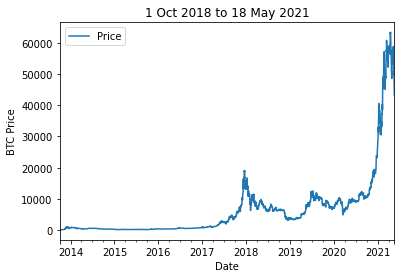

In [10]:
import matplotlib.pyplot as plt
bitcoin_prices.plot()
plt.ylabel("BTC Price")
plt.title("1 Oct 2018 to 18 May 2021")

<Axes: xlabel='Date'>

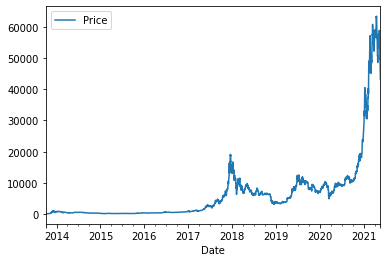

In [12]:
bitcoin_prices.plot()

### Importing with CSV Module

In [13]:
import csv
from datetime import datetime
timesteps = []
btc_price = []
with open ("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",'r') as f:
  reader = csv.reader(f,delimiter = ",")
  next(reader)
  for line in reader:
    timesteps.append(datetime.strptime(line[1],"%Y-%m-%d"))
    btc_price.append(float(line[2]))

In [14]:
btc_price[:10]

[123.65499,
 125.455,
 108.58483,
 118.67466,
 121.33866,
 120.65533,
 121.795,
 123.033,
 124.049,
 125.96116]

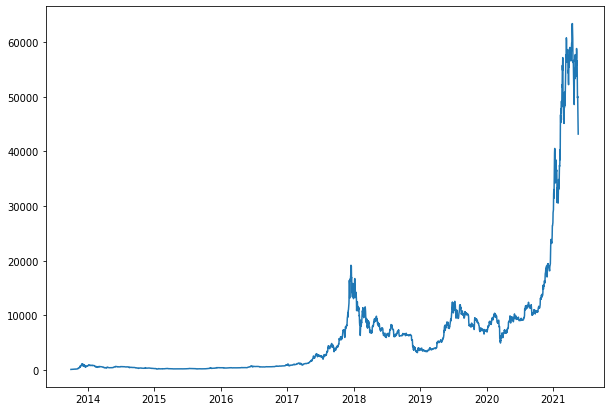

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
plt.plot(timesteps,btc_price)

### Creating train and test sets with time series data (Wrong Way)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices['Price'].to_numpy()

In [18]:
timesteps,prices

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', ...,
        '2021-05-16T00:00:00.000000000', '2021-05-17T00:00:00.000000000',
        '2021-05-18T00:00:00.000000000'], dtype='datetime64[ns]'),
 array([  123.65499   ,   125.455     ,   108.58483   , ...,
        47885.62525472, 45604.61575361, 43144.47129086]))

In [19]:
x_train,x_test,y_train,y_test = train_test_split(timesteps,prices,test_size = 0.2)

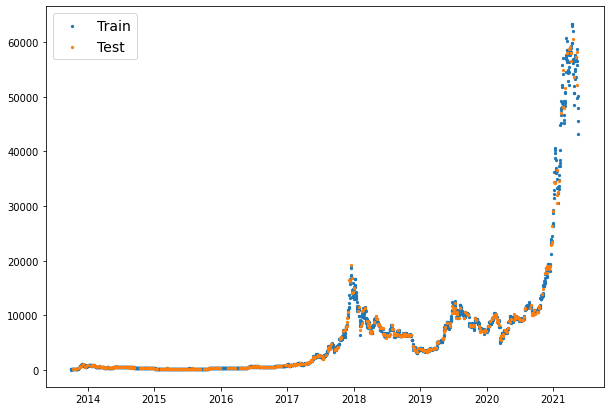

In [20]:
plt.figure(figsize = (10,7))
plt.scatter(x_train,y_train,s = 5,label = "Train")
plt.scatter(x_test,y_test,s = 5,label = "Test")
plt.legend(fontsize = 14)

### Creating splits for time series (right way)

In [21]:
split_size = int(0.8*len(prices))
x_train,y_train = timesteps[:split_size],prices[:split_size]
x_test,y_test  = timesteps[split_size:],prices[split_size:]

In [22]:
len(x_train),len(x_test)

(2229, 558)

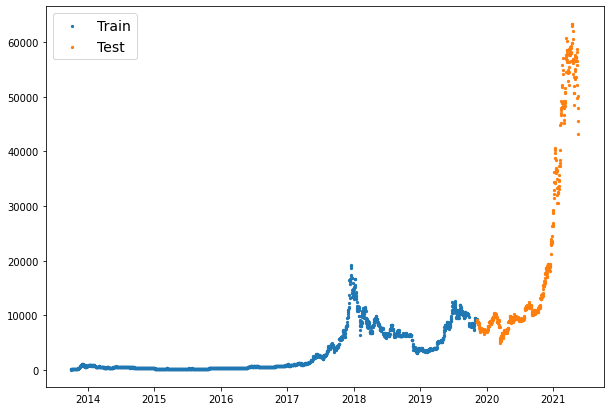

In [23]:
plt.figure(figsize = (10,7))
plt.scatter(x_train,y_train,s = 5,label = "Train")
plt.scatter(x_test,y_test,s = 5,label = "Test")
plt.legend(fontsize = 14)

### Creating plot functions

In [24]:
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).
  
  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

## Model 0 - Naive Baselline

In [35]:
naive_forecast = y_test[:-1]

In [28]:
naive_forecast[-10:]

array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
       56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
       47885.62525472, 45604.61575361])

In [29]:
y_test[-10:]

array([58788.20967893, 58102.19142623, 55715.54665129, 56573.5554719 ,
       52147.82118698, 49764.1320816 , 50032.69313676, 47885.62525472,
       45604.61575361, 43144.47129086])

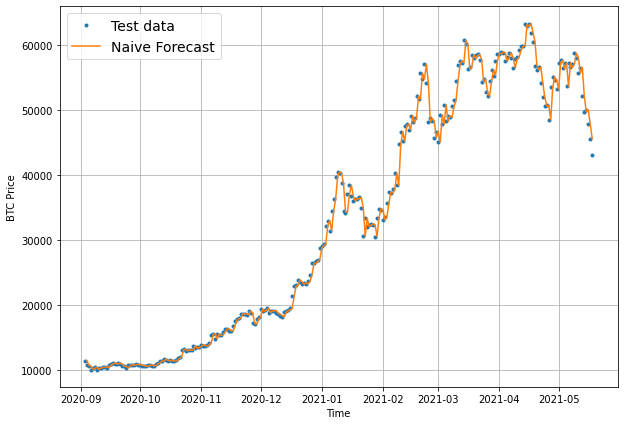

In [30]:
plt.figure(figsize=(10, 7))
offset = 300 # offset the values by 300 timesteps 
plot_time_series(timesteps=x_test, values=y_test, start=offset, label="Test data")
plot_time_series(timesteps=x_test[1:], values=naive_forecast, format="-", start=offset, label="Naive Forecast")

In [31]:
import tensorflow as tf

In [32]:
# MASE Implementation
def mean_absolute_scaled_error(y_true,y_pred):
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))

  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:]-y_true[:-1]))

  return mae/mae_naive_no_season

In [36]:
mean_absolute_scaled_error(y_true = y_test[1:],y_pred = naive_forecast).numpy()

0.9995699939182624

In [43]:
def evaluation_metrics(y_pred,y_true):
  y_true = tf.cast(y_true,dtype = tf.float32)
  y_pred = tf.cast(y_pred,dtype = tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(y_true,y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true,y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true,y_pred)
  mase = mean_absolute_scaled_error(y_true,y_pred)
  return {"mae":mae.numpy(),"mse":mse.numpy(),"rmse":rmse.numpy(),"mape":mape.numpy(),"mase":mase.numpy()}


In [44]:
naive_results = evaluation_metrics(y_test[1:],naive_forecast)

In [45]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.527042,
 'mase': 1.0060278}

In [46]:
tf.reduce_mean(y_test)

<tf.Tensor: shape=(), dtype=float64, numpy=20056.632963737226>

In [47]:
tf.reduce_min(y_test)

<tf.Tensor: shape=(), dtype=float64, numpy=4944.7023359837>

## Windowing dataset

In [48]:
HORIZON = 1 #Predict 1 Day
WINDOW = 7 #Use past week of Bitcoin data to one predictor


In [53]:
def get_labelled_window(x,horizon = HORIZON):
  '''
    Create Labels for windowed dataset.
    E.g. If Horizon = 1
    Input: [0,1,2,3,4,5,6,7] -> Output: ([0,1,2,3,4,5,6] -> [7]) Window Size = 7
  '''
  return x[:,:-horizon],x[:,-horizon:]

In [55]:
test_window,test_label = get_labelled_window(tf.expand_dims(tf.range(8)+1,axis = 0))

In [57]:
tf.expand_dims(tf.range(8)+1,axis = 0)

<tf.Tensor: shape=(1, 8), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7, 8]], dtype=int32)>

In [59]:
print("Window : {x} -> Label: {y}".format(x = tf.squeeze(test_window).numpy(),y = tf.squeeze(test_label).numpy()))

Window : [1 2 3 4 5 6 7] -> Label: 8


## Preprocessing Functions for Windowed Data

In [60]:
import numpy as np

In [66]:
def make_windows(x,window_size =  WINDOW,horizon = HORIZON):
  window_step = np.expand_dims(np.arange(window_size+horizon),axis = 0)
  window_indexes = window_step+np.expand_dims(np.arange(len(x)-(window_size+horizon-1)),axis = 0).T
  windowed_array = x[window_indexes]
  
  windows,labels = get_labelled_window(windowed_array,horizon = HORIZON)
  return windows,labels

In [67]:
full_windows,full_labels = make_windows(prices,window_size = WINDOW,horizon = HORIZON)

In [69]:
for i in range(3):
  print(full_windows[i],"->",full_labels[i])

[123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> [123.033]
[125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> [124.049]
[108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> [125.96116]


## Turning windows into Training and Test Sets

In [70]:
def make_train_test_splits(windows,labels,test_split = 0.2):
  split_size = int(len(windows)*(1-test_split))
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows,test_windows,train_labels,test_labels

In [71]:
train_windows,test_windows,train_labels,test_labels = make_train_test_splits(full_windows,full_labels)t

## Making modelling checkpoint

In [81]:
import os
def create_model_checkpoint(model_name,save_path = "model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath = os.path.join(save_path,model_name),verbose=0,save_best_only = True)

## Model 1 - Dense Model

In [75]:
import tensorflow as tf
from tensorflow.keras import layers
tf.random.set_seed(42)

In [76]:
model_1 = tf.keras.Sequential([
    layers.Dense(128,activation = "relu"),
    layers.Dense(HORIZON,activation = "linear")
],name = "model_1_dense")

model_1.compile(loss = "mae",metrics = ["mae"],optimizer = "adam")

In [82]:
history_1 = model_1.fit(
    train_windows,
    train_labels,
    epochs = 100,
    verbose = 1,
    batch_size = 128,
    validation_data = (test_windows,test_labels),
    callbacks = [create_model_checkpoint(model_name = model_1.name)]
)

Epoch 1/100
 1/18 [>.............................] - ETA: 0s - loss: 121.1727 - mae: 121.1727

18/18 [==============================] - 1s 46ms/step - loss: 112.8989 - mae: 112.8989 - val_loss: 569.6254 - val_mae: 569.6254
Epoch 2/100
18/18 [==============================] - 0s 4ms/step - loss: 108.6099 - mae: 108.6099 - val_loss: 589.1101 - val_mae: 589.1101
Epoch 3/100
18/18 [==============================] - 0s 4ms/step - loss: 109.7453 - mae: 109.7453 - val_loss: 576.8027 - val_mae: 576.8027
Epoch 4/100
18/18 [==============================] - 0s 4ms/step - loss: 109.8995 - mae: 109.8995 - val_loss: 574.7753 - val_mae: 574.7753
Epoch 5/100
18/18 [==============================] - 0s 3ms/step - loss: 106.5269 - mae: 106.5269 - val_loss: 576.0266 - val_mae: 576.0266
Epoch 6/100
18/18 [==============================] - 0s 3ms/step - loss: 106.0377 - mae: 106.0377 - val_loss: 573.4740 - val_mae: 573.4740
Epoch 7/100
18/18 [==============================] - 0s 3ms/step - loss: 105.0579 - mae: 105.0579 - val_loss: 608.0176 - val_mae: 608.0176
Epoch 8/100
18/18 [===================

18/18 [==============================] - 0s 28ms/step - loss: 107.6408 - mae: 107.6408 - val_loss: 567.0719 - val_mae: 567.0719
Epoch 10/100
18/18 [==============================] - 0s 3ms/step - loss: 110.4572 - mae: 110.4572 - val_loss: 585.3452 - val_mae: 585.3452
Epoch 11/100
18/18 [==============================] - 0s 3ms/step - loss: 108.6270 - mae: 108.6270 - val_loss: 625.0092 - val_mae: 625.0092
Epoch 12/100
18/18 [==============================] - 0s 4ms/step - loss: 112.6504 - mae: 112.6504 - val_loss: 625.9105 - val_mae: 625.9105
Epoch 13/100
18/18 [==============================] - 0s 4ms/step - loss: 118.5333 - mae: 118.5333 - val_loss: 615.8691 - val_mae: 615.8691
Epoch 14/100
18/18 [==============================] - 0s 3ms/step - loss: 115.9741 - mae: 115.9741 - val_loss: 607.1719 - val_mae: 607.1719
Epoch 15/100
18/18 [==============================] - 0s 4ms/step - loss: 108.4725 - mae: 108.4725 - val_loss: 569.0176 - val_mae: 569.0176
Epoch 16/100
 1/18 [>...........

18/18 [==============================] - 0s 28ms/step - loss: 105.4755 - mae: 105.4755 - val_loss: 566.8364 - val_mae: 566.8364
Epoch 17/100
18/18 [==============================] - 0s 3ms/step - loss: 105.0597 - mae: 105.0597 - val_loss: 583.8495 - val_mae: 583.8495
Epoch 18/100
18/18 [==============================] - 0s 3ms/step - loss: 106.3648 - mae: 106.3648 - val_loss: 572.0922 - val_mae: 572.0922
Epoch 19/100
18/18 [==============================] - 0s 3ms/step - loss: 108.8075 - mae: 108.8075 - val_loss: 683.9072 - val_mae: 683.9072
Epoch 20/100
18/18 [==============================] - 0s 4ms/step - loss: 108.3095 - mae: 108.3095 - val_loss: 568.1822 - val_mae: 568.1822
Epoch 21/100
18/18 [==============================] - 0s 4ms/step - loss: 106.4364 - mae: 106.4364 - val_loss: 588.7002 - val_mae: 588.7002
Epoch 22/100
 1/18 [>.............................] - ETA: 0s - loss: 152.8972 - mae: 152.8972

18/18 [==============================] - 0s 27ms/step - loss: 107.9947 - mae: 107.9947 - val_loss: 566.8206 - val_mae: 566.8206
Epoch 23/100
18/18 [==============================] - 0s 3ms/step - loss: 105.9813 - mae: 105.9813 - val_loss: 567.2925 - val_mae: 567.2925
Epoch 24/100
18/18 [==============================] - 0s 4ms/step - loss: 105.2716 - mae: 105.2716 - val_loss: 567.6715 - val_mae: 567.6715
Epoch 25/100
 1/18 [>.............................] - ETA: 0s - loss: 113.3586 - mae: 113.3586

18/18 [==============================] - 1s 30ms/step - loss: 105.0493 - mae: 105.0493 - val_loss: 566.7610 - val_mae: 566.7610
Epoch 26/100
18/18 [==============================] - 0s 4ms/step - loss: 105.2666 - mae: 105.2666 - val_loss: 570.5366 - val_mae: 570.5366
Epoch 27/100
18/18 [==============================] - 0s 5ms/step - loss: 105.2957 - mae: 105.2957 - val_loss: 572.1630 - val_mae: 572.1630
Epoch 28/100
18/18 [==============================] - 0s 4ms/step - loss: 104.9762 - mae: 104.9762 - val_loss: 568.6022 - val_mae: 568.6022
Epoch 29/100
18/18 [==============================] - 0s 5ms/step - loss: 105.4578 - mae: 105.4578 - val_loss: 568.0245 - val_mae: 568.0245
Epoch 30/100
18/18 [==============================] - 0s 5ms/step - loss: 108.6667 - mae: 108.6667 - val_loss: 568.8176 - val_mae: 568.8176
Epoch 31/100
18/18 [==============================] - 0s 4ms/step - loss: 105.0699 - mae: 105.0699 - val_loss: 648.2152 - val_mae: 648.2152
Epoch 32/100
18/18 [============

18/18 [==============================] - 1s 36ms/step - loss: 110.7220 - mae: 110.7220 - val_loss: 565.0109 - val_mae: 565.0109
Epoch 38/100
18/18 [==============================] - 0s 3ms/step - loss: 107.7625 - mae: 107.7625 - val_loss: 574.2205 - val_mae: 574.2205
Epoch 39/100
18/18 [==============================] - 0s 3ms/step - loss: 105.4299 - mae: 105.4299 - val_loss: 566.1823 - val_mae: 566.1823
Epoch 40/100
18/18 [==============================] - 0s 3ms/step - loss: 104.4793 - mae: 104.4793 - val_loss: 570.7411 - val_mae: 570.7411
Epoch 41/100
18/18 [==============================] - 0s 3ms/step - loss: 105.6438 - mae: 105.6438 - val_loss: 576.5659 - val_mae: 576.5659
Epoch 42/100
18/18 [==============================] - 0s 4ms/step - loss: 106.3023 - mae: 106.3023 - val_loss: 568.9901 - val_mae: 568.9901
Epoch 43/100
18/18 [==============================] - 0s 4ms/step - loss: 105.6903 - mae: 105.6903 - val_loss: 602.7177 - val_mae: 602.7177
Epoch 44/100
18/18 [============

18/18 [==============================] - 0s 26ms/step - loss: 106.3159 - mae: 106.3159 - val_loss: 564.5448 - val_mae: 564.5448
Epoch 73/100
 1/18 [>.............................] - ETA: 0s - loss: 118.0347 - mae: 118.0347

18/18 [==============================] - 0s 25ms/step - loss: 106.5085 - mae: 106.5085 - val_loss: 563.9613 - val_mae: 563.9613
Epoch 74/100
18/18 [==============================] - 0s 4ms/step - loss: 105.8437 - mae: 105.8437 - val_loss: 567.3108 - val_mae: 567.3108
Epoch 75/100
18/18 [==============================] - 0s 3ms/step - loss: 105.3657 - mae: 105.3657 - val_loss: 580.1323 - val_mae: 580.1323
Epoch 76/100
18/18 [==============================] - 0s 3ms/step - loss: 106.5219 - mae: 106.5219 - val_loss: 573.9106 - val_mae: 573.9106
Epoch 77/100
18/18 [==============================] - 0s 3ms/step - loss: 106.4942 - mae: 106.4942 - val_loss: 580.2068 - val_mae: 580.2068
Epoch 78/100
18/18 [==============================] - 0s 3ms/step - loss: 105.3621 - mae: 105.3621 - val_loss: 574.8167 - val_mae: 574.8167
Epoch 79/100
18/18 [==============================] - 0s 3ms/step - loss: 105.2379 - mae: 105.2379 - val_loss: 571.7339 - val_mae: 571.7339
Epoch 80/100
18/18 [============

In [96]:
model_1_results = model_1.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 1ms/step - loss: 614.3069 - mae: 614.3069


In [85]:
def make_preds(model,input_data):
  forecast = model.predict(input_data)
  return tf.squeeze(forecast)

In [86]:
model_1_preds = make_preds(model_1,test_windows)

18/18 [==============================] - 0s 2ms/step


In [95]:
evaluation_metrics(y_true = tf.squeeze(test_labels),y_pred=model_1_preds)

{'mae': 614.30695,
 'mse': 1245580.9,
 'rmse': 1116.0559,
 'mape': 2.786297,
 'mase': 1.0791671}

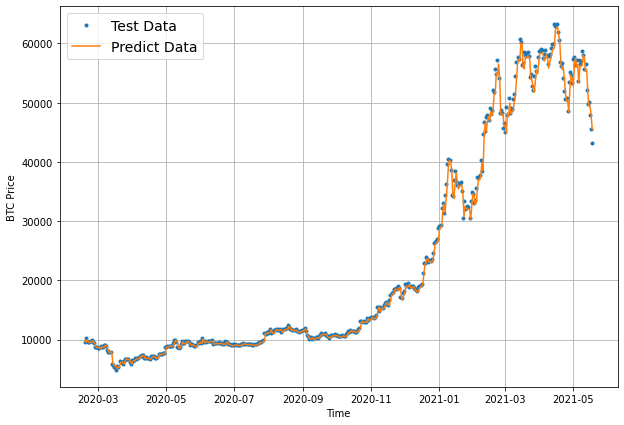

In [99]:
offset = 100
plt.figure(figsize = (10,7))
plot_time_series(timesteps = x_test[-len(test_windows):],values = test_labels[:,0],start = offset,label = "Test Data")
plot_time_series(timesteps = x_test[-len(test_windows):],values = model_1_preds,start = offset,label = "Predict Data",format = "-")